In [1]:
#installing lightGBM algorithm
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#importing datasets
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#Create the LightGBM model
import lightgbm as lgb
model = lgb.LGBMClassifier()

In [5]:
#Train the model
model.fit(X_train, y_train)

LGBMClassifier()

In [6]:
#Evaluate the model
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 96.49%


In [7]:
# Define hyperparameters to be tuned
param_grid = {
    'num_leaves': [31, 64, 128],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [9]:
# Create grid search object and fit to training data
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5], 'num_leaves': [31, 64, 128]})

In [10]:
# Evaluate the best model
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best parameters: ", grid_search.best_params_)
print("Accuracy: {:.2f}%".format(accuracy*100))

Best parameters:  {'learning_rate': 0.1, 'max_depth': 4, 'num_leaves': 31}
Accuracy: 96.49%


#SHAP

In [12]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 10.0 MB/s eta 0:00:00


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.103001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 150, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

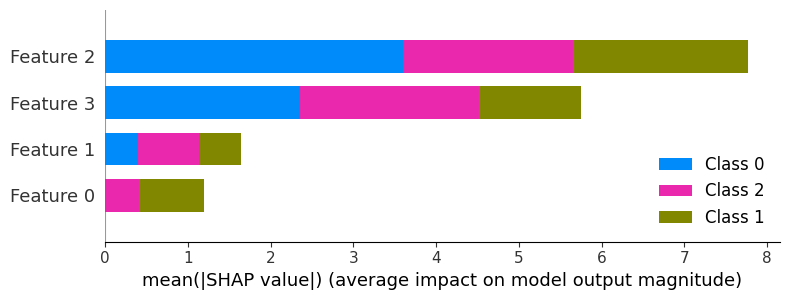

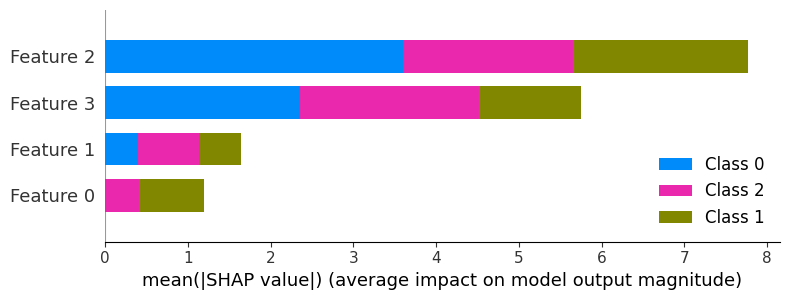

In [14]:
import lightgbm as lgb
import shap
from sklearn.datasets import load_iris

# load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# train a LightGBM model
d_train = lgb.Dataset(X, label=y)
params = {'objective': 'multiclass', 'num_class': 3}
model = lgb.train(params, d_train)

# create a SHAP explainer object
explainer = shap.TreeExplainer(model)

# generate SHAP values for a set of input examples
shap_values = explainer.shap_values(X)

# visualize the SHAP values
shap.summary_plot(shap_values, X, plot_type="bar")
shap.summary_plot(shap_values, X)
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X[0,:])

[LightGBM] [Info] Number of positive: 82, number of negative: 38
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.683333 -> initscore=0.769133
[LightGBM] [Info] Start training from score 0.769133
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


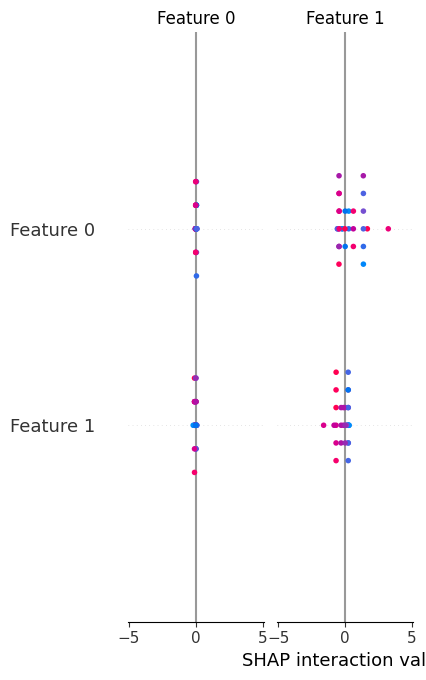

In [16]:
from sklearn.datasets import load_iris

# load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a LightGBM model
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05
}
model = lgb.train(params, lgb.Dataset(X_train, y_train))

# Calculate SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Plot the feature importance
shap.summary_plot(shap_values, X_test)

#Histogram based gradient boosting and feature sub-sampling

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [18]:
#create a model with histogram-based gradient boosting and feature sub-sampling
import lightgbm as lgb

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'max_depth': -1,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'histogram_pool_size': 2048,
    'histogram_accuracy': 0.01
}

dtrain = lgb.Dataset(X_train, label=y_train)

model = lgb.train(params, dtrain, num_boost_round=100)

[LightGBM] [Warning] Unknown parameter: histogram_accuracy


In [19]:
#prediction
y_pred = model.predict(X_test)

In [20]:
#metrics
from sklearn.metrics import roc_auc_score
print('AUC:', roc_auc_score(y_test, y_pred))

AUC: 0.990501146413364


#Performance benchmarks

In [24]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate LightGBM
start_time = time.time()
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
lgb_time = time.time() - start_time
lgb_accuracy = accuracy_score(y_test, lgb_pred)

# Train and evaluate XGBoost
start_time = time.time()
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_time = time.time() - start_time
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Train and evaluate RandomForest
start_time = time.time()
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_time = time.time() - start_time
rf_accuracy = accuracy_score(y_test, rf_pred)

# Print the results
print("LightGBM - Training time: {:.2f}s, Accuracy: {:.2f}%".format(lgb_time, lgb_accuracy*100))
print("XGBoost - Training time: {:.2f}s, Accuracy: {:.2f}%".format(xgb_time, xgb_accuracy*100))
print("RandomForest - Training time: {:.2f}s, Accuracy: {:.2f}%".format(rf_time, rf_accuracy*100))

LightGBM - Training time: 0.13s, Accuracy: 96.49%
XGBoost - Training time: 0.10s, Accuracy: 95.61%
RandomForest - Training time: 0.25s, Accuracy: 96.49%


#Regression

In [25]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=42)

In [26]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, label=y_train)
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}
num_round = 1000
model = lgb.train(params, lgb_train, num_round)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 595
[LightGBM] [Info] Number of data points in the train set: 353, number of used features: 10
[LightGBM] [Info] Start training from score 153.736544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [27]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 56.99802722523356
